In [11]:
import numpy as np
import pandas as pd 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [12]:
tickers = ['PG', 'MSFT', 'F']
data_stock = pd.DataFrame()
for t in tickers:
    data_stock[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1')['Adj Close']

In [13]:
data_stock

,PG,MSFT,F
Date,,,
1999-12-31,29.213900,37.453701,15.327993
2000-01-03,28.580601,37.393559,15.058455
2000-01-04,28.030664,36.130390,14.555305
2000-01-05,27.497383,36.511333,14.609213
2000-01-06,28.763931,35.288280,14.627183
...,...,...,...
2020-02-20,126.580002,184.419998,8.030000
2020-02-21,126.699997,178.589996,7.890000
2020-02-24,123.300003,170.889999,7.570000


In [14]:
data_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5070 entries, 1999-12-31 to 2020-02-26
Data columns (total 3 columns):
PG      5070 non-null float64
MSFT    5070 non-null float64
F       5070 non-null float64
dtypes: float64(3)
memory usage: 158.4 KB


In [15]:
data_stock.head(10)

,PG,MSFT,F
Date,,,
1999-12-31,29.213900,37.453701,15.327993
2000-01-03,28.580601,37.393559,15.058455
2000-01-04,28.030664,36.130390,14.555305
2000-01-05,27.497383,36.511333,14.609213
2000-01-06,28.763931,35.288280,14.627183
2000-01-07,31.063711,35.749432,15.705349
2000-01-10,30.913725,36.010086,15.417836
2000-01-11,31.397017,35.087776,15.004542
2000-01-12,31.197050,33.944916,15.435810


In [16]:
data_stock.tail(10)

,PG,MSFT,F
Date,,,
2020-02-12,123.449997,184.206863,8.240
2020-02-13,124.959999,183.209595,8.250
2020-02-14,126.139999,184.845123,8.100
2020-02-18,124.870003,186.720001,8.060
2020-02-19,125.440002,187.279999,8.000
2020-02-20,126.580002,184.419998,8.030
2020-02-21,126.699997,178.589996,7.890
2020-02-24,123.300003,170.889999,7.570
2020-02-25,121.430000,168.070007,7.230


In [17]:
#Simlpe Returns  of a portfolio of stocks

data_stock.iloc[0]

PG      29.213900
MSFT    37.453701
F       15.327993
Name: 1999-12-31 00:00:00, dtype: float64

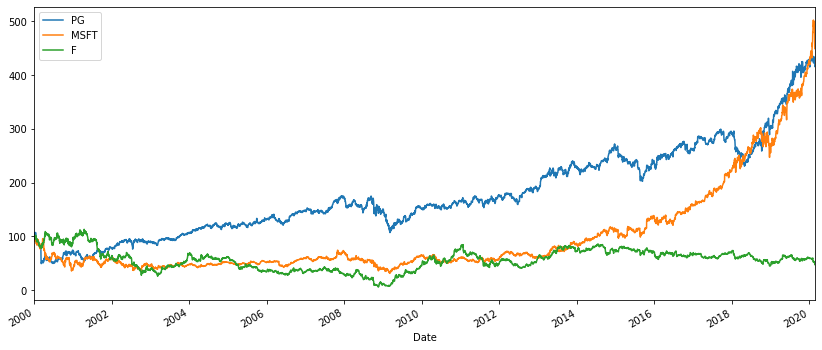

In [18]:
(data_stock / data_stock.iloc[0] * 100).plot(figsize = (14, 6));
plt.show()

In [19]:
# Calculating returns of the portfolio

returns = (data_stock / data_stock.shift(1)) - 1
returns.head()

,PG,MSFT,F
Date,,,
1999-12-31,NaN,NaN,NaN
2000-01-03,-0.021678,-0.001606,-0.017585
2000-01-04,-0.019242,-0.033780,-0.033413
2000-01-05,-0.019025,0.010544,0.003704
2000-01-06,0.046061,-0.033498,0.001230


In [20]:
weights = np.array([0.45, 0.30, 0.25])

In [21]:
np.dot(returns, weights)

array([        nan, -0.01463302, -0.02714609, ..., -0.03514981,
       -0.0230039 ,  0.01584297])

In [22]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.092436
MSFT    0.120281
F       0.048458
dtype: float64

In [23]:
np.dot(annual_returns, weights)

0.08979518917101409

In [24]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

8.98 %


In [25]:
#risk of security in the portfolio

sec_returns = np.log(data_stock / data_stock.shift(1))
#returns = data_stock.pct_change()

In [26]:
sec_returns
#returns

,PG,MSFT,F
Date,,,
1999-12-31,NaN,NaN,NaN
2000-01-03,-0.021916,-0.001607,-0.017741
2000-01-04,-0.019429,-0.034364,-0.033984
2000-01-05,-0.019208,0.010488,0.003697
2000-01-06,0.045031,-0.034072,0.001229
...,...,...,...
2020-02-20,0.009047,-0.015389,0.003743
2020-02-21,0.000948,-0.032123,-0.017588
2020-02-24,-0.027202,-0.044073,-0.041403


In [27]:
sec_returns['PG'].mean()
sec_returns['PG'].mean() * 250
sec_returns['PG'].std()
sec_returns['PG'].std() * 250 ** 0.5

0.21144184922338888

In [28]:
sec_returns['MSFT'].mean()
sec_returns['MSFT'].mean() * 250
sec_returns['MSFT'].std()
sec_returns['MSFT'].std() * 250 ** 0.5

0.2998781948293477

In [29]:
sec_returns['F'].mean()
sec_returns['F'].mean() * 250
sec_returns['F'].std()
sec_returns['F'].std() * 250 ** 0.5

0.41043881204297983

In [30]:
#Variance and co variance
PG_var =sec_returns['PG'].var()
PG_var

0.00017883062241202523

In [31]:
PG_var_a =sec_returns['PG'].var()*250
PG_var_a

0.04470765560300631

In [32]:
MSFT_var =sec_returns['MSFT'].var()
MSFT_var

0.00035970772693643283

In [33]:
MSFT_var_a =sec_returns['MSFT'].var() *250
MSFT_var_a

0.0899269317341082

In [34]:
F_var =sec_returns['F'].var()
F_var

0.0006738400737250101

In [35]:
F_var =sec_returns['F'].var()* 250
F_var

0.16846001843125252

In [36]:
cov_matrix = sec_returns.cov()
cov_matrix

,PG,MSFT,F
PG,0.000179,0.000059,0.000079
MSFT,0.000059,0.000360,0.000166
F,0.000079,0.000166,0.000674


In [37]:
cov_matrix_a = sec_returns.cov()*250
cov_matrix_a

,PG,MSFT,F
PG,0.044708,0.014833,0.019638
MSFT,0.014833,0.089927,0.041410
F,0.019638,0.041410,0.168460


In [38]:
corr_matrix = sec_returns.corr()
corr_matrix

,PG,MSFT,F
PG,1.000000,0.233940,0.226286
MSFT,0.233940,1.000000,0.336443
F,0.226286,0.336443,1.000000


In [39]:
#Calculating portfolio risk

In [72]:
weights = np.array([0.25,0.35,0.40])

In [73]:
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))
pfolio_var

0.05888212262998281

In [74]:
pfolio_vol = (np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))) ** 0.5
pfolio_vol

0.2426563879851153

In [75]:
print (str(round(pfolio_vol, 5) * 100) + ' %')

24.266 %


In [76]:
avg_returns= sec_returns.mean() #check this once 

In [77]:
avg_returns

PG      0.000282
MSFT    0.000301
F      -0.000143
dtype: float64

In [78]:
port_mean = avg_returns.dot(weights)

In [79]:
port_mean

0.00011858315825242164

In [80]:
initial_investment = 1000000

In [81]:
mean_investment = (1+port_mean) * initial_investment

In [82]:
stdev_investment = initial_investment * pfolio_vol
stdev_investment

242656.3879851153

In [83]:
conf_level1 = 0.05

In [84]:
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)

In [85]:
cutoff1

600984.3432779917

In [86]:
var_1d1 = initial_investment - cutoff1

In [87]:
var_1d1

399015.65672200825